Lesson 3: Practical Deep Learning for Coders 2022
https://www.youtube.com/watch?v=hBBOjCiFcuo

Architectures are mathematical functions
https://www.kaggle.com/code/jhoward/which-image-models-are-best
- e.g. resnet34

In [1]:
# install pytorch - https://pytorch.org/get-started/locally/
import torch

print(torch.cuda.is_available())
print(torch.cuda.device_count())

current_device = torch.cuda.current_device()
print(torch.cuda.device(current_device))
print(torch.cuda.get_device_name(current_device))

True
1
NVIDIA GeForce RTX 3070


### 16:30 Trying different image models, using `timm` module

In [1]:
import timm

timm.list_models("*convnext*")

['convnext_atto',
 'convnext_atto_ols',
 'convnext_base',
 'convnext_femto',
 'convnext_femto_ols',
 'convnext_large',
 'convnext_large_mlp',
 'convnext_nano',
 'convnext_nano_ols',
 'convnext_pico',
 'convnext_pico_ols',
 'convnext_small',
 'convnext_tiny',
 'convnext_tiny_hnf',
 'convnext_xlarge',
 'convnext_xxlarge',
 'convnextv2_atto',
 'convnextv2_base',
 'convnextv2_femto',
 'convnextv2_huge',
 'convnextv2_large',
 'convnextv2_nano',
 'convnextv2_pico',
 'convnextv2_small',
 'convnextv2_tiny']

In [2]:
from fastai.vision.all import *
import timm

path = untar_data(URLs.PETS)
print(path.ls())

image_path = path/"images"

# image sample filenames:
# american_bulldog_81.jpg, Abyssinian_3.jpg
# https://forums.fast.ai/t/question-about-from-name-re-labeling-based-on-regex-expression/61779
# For labelling function
# def get_label_func(filename: str) -> bool:
    # extract just the animal breed from filename
    # pattern = r"([^/]+)_\d+\.jpg$"
    # print(re.search(pattern, filename).group(1))

# https://docs.fast.ai/data.transforms.html#regexlabeller
dls = ImageDataLoaders.from_name_func(path=image_path, 
                                      fnames=get_image_files(image_path), 
                                      valid_pct=0.2, 
                                      seed=42, 
                                      label_func=RegexLabeller(r"([^/]+)_\d+\.jpg$"), 
                                      item_tfms=Resize(224),
                                      batch_tfms=aug_transforms()
                                     )

[Path('C:/Users/jerem/.fastai/data/oxford-iiit-pet/annotations'), Path('C:/Users/jerem/.fastai/data/oxford-iiit-pet/images')]


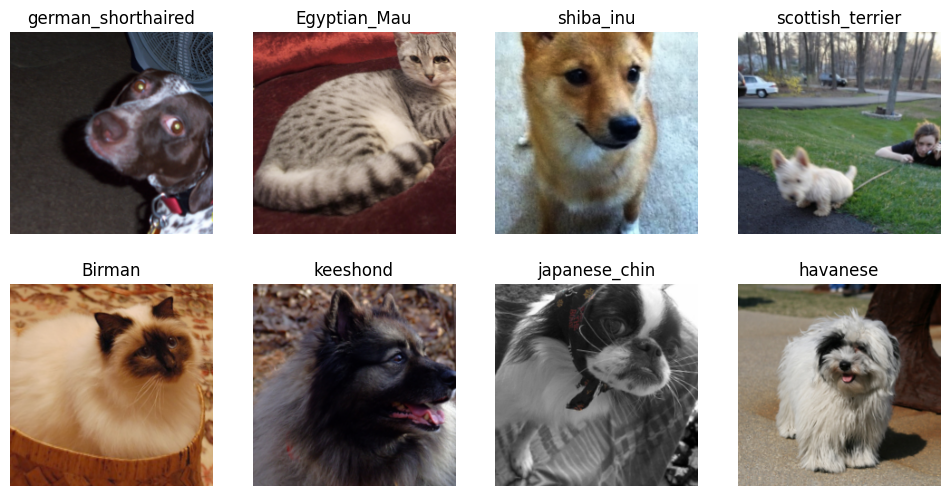

In [6]:
# help(dls.show_batch)
dls.show_batch(max_n=8, nrows=2)

In [7]:
learner = vision_learner(dls, "resnet18", metrics=error_rate)
learner.fine_tune(4)

epoch,train_loss,valid_loss,error_rate,time
0,2.026424,0.555744,0.171854,00:31


epoch,train_loss,valid_loss,error_rate,time
0,0.830445,0.422709,0.135318,00:33
1,0.678392,0.363954,0.115697,00:33
2,0.550976,0.358808,0.113667,00:33
3,0.490409,0.344345,0.106225,00:34


In [2]:
# try convnext_nano architecture model
convnext_nano_learner = vision_learner(dls, "convnext_nano", metrics=error_rate)
convnext_nano_learner.fine_tune(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.015745,0.218209,0.066306,00:38


epoch,train_loss,valid_loss,error_rate,time
0,0.293423,0.192289,0.060893,00:57
1,0.237967,0.199146,0.062246,00:57
2,0.173370,0.169199,0.050744,00:57
3,0.111599,0.151689,0.048038,00:57


In [18]:
# from fastai.vision.core import PILImage

basset_hound_image = PILImage.create("basset_hound_example.jpg")
print(type(basset_hound_image))

result = convnext_nano_learner.predict(basset_hound_image)

# order of the category probabilities are in the learner dataloaders vocab (learner.dls.vocab)
print(result)

<class 'fastai.vision.core.PILImage'>


('basset_hound', tensor(14), tensor([1.0495e-08, 2.9877e-09, 3.2629e-08, 5.6459e-09, 2.1574e-09, 1.0730e-08,
        7.8206e-08, 3.8716e-07, 2.8279e-09, 3.5324e-09, 1.2508e-08, 1.5525e-09,
        2.1939e-09, 9.2920e-10, 1.0000e+00, 9.1222e-07, 2.2264e-07, 4.6068e-10,
        4.1310e-09, 2.0164e-09, 1.0983e-09, 6.1958e-08, 1.7499e-07, 1.5554e-08,
        1.8286e-08, 2.3378e-09, 1.2783e-08, 1.8699e-08, 2.7294e-09, 3.5875e-10,
        3.4546e-09, 6.4025e-08, 1.2449e-06, 3.0891e-09, 3.0758e-08, 1.2474e-08,
        4.8538e-09]))


In [12]:
# 19:50 
import json

categories = convnext_nano_learner.dls.vocab

def classify_image(img):
    pred,idx,probs = convnext_nano_learner.predict(img)
    # return dict of category mapped to the predicted probability (converted to float)
    return dict(zip(categories, map(float, probs)))

print(json.dumps(classify_image(basset_hound_image), indent=2))

{
  "Abyssinian": 1.049483344672808e-08,
  "Bengal": 2.9877313956205853e-09,
  "Birman": 3.2628967971959355e-08,
  "Bombay": 5.645858447422825e-09,
  "British_Shorthair": 2.157407141822887e-09,
  "Egyptian_Mau": 1.0730255795010635e-08,
  "Maine_Coon": 7.820582226258921e-08,
  "Persian": 3.8715890582352586e-07,
  "Ragdoll": 2.8278750452415125e-09,
  "Russian_Blue": 3.532434345032698e-09,
  "Siamese": 1.2508265534449947e-08,
  "Sphynx": 1.552491246670229e-09,
  "american_bulldog": 2.1939032812667847e-09,
  "american_pit_bull_terrier": 9.29198107346707e-10,
  "basset_hound": 0.999996542930603,
  "beagle": 9.122201731770474e-07,
  "boxer": 2.226394002491361e-07,
  "chihuahua": 4.6068182601999297e-10,
  "english_cocker_spaniel": 4.131023967346437e-09,
  "english_setter": 2.01644390074307e-09,
  "german_shorthaired": 1.0982574849549565e-09,
  "great_pyrenees": 6.19581257410573e-08,
  "havanese": 1.7498913962299412e-07,
  "japanese_chin": 1.555432227462461e-08,
  "keeshond": 1.828619744514981

In [19]:
# path of export is in convnext_nano_learner.path
print(convnext_nano_learner.path)
convnext_nano_learner.export()

# 20:40
Learner has 2 main things
1) list of preprocessing steps you did to turn images into the model (the information of the dataloaders, datablocks)
2) trained model (in the learner.model attribute)

In [8]:
convnext_nano_learner = load_learner("convnext_nano_learner.pkl")
print(convnext_nano_learner.model)

Sequential(
  (0): TimmBody(
    (model): ConvNeXt(
      (stem): Sequential(
        (0): Conv2d(3, 80, kernel_size=(4, 4), stride=(4, 4))
        (1): LayerNorm2d((80,), eps=1e-06, elementwise_affine=True)
      )
      (stages): Sequential(
        (0): ConvNeXtStage(
          (downsample): Identity()
          (blocks): Sequential(
            (0): ConvNeXtBlock(
              (conv_dw): Conv2d(80, 80, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3), groups=80)
              (norm): LayerNorm2d((80,), eps=1e-06, elementwise_affine=True)
              (mlp): Mlp(
                (fc1): Conv2d(80, 320, kernel_size=(1, 1), stride=(1, 1))
                (act): GELU()
                (drop1): Dropout(p=0.0, inplace=False)
                (norm): Identity()
                (fc2): Conv2d(320, 80, kernel_size=(1, 1), stride=(1, 1))
                (drop2): Dropout(p=0.0, inplace=False)
              )
              (shortcut): Identity()
              (drop_path): Identity()
          

In [9]:
m = convnext_nano_learner.model
l = m.get_submodule("0.model.stem.1")
list(l.parameters())

[Parameter containing:
 tensor([ 7.9423e-01,  9.4454e-01,  5.9448e-01,  6.9200e-01, -3.9086e-03,
         -7.9104e-01, -1.1464e-03,  1.4109e-01,  1.4648e+00,  6.9508e-01,
          8.4762e-01,  4.2537e+00,  1.8685e+00,  2.2211e+00, -2.8220e-03,
          1.8500e+00,  7.8334e-01,  5.5831e-01,  5.4940e-02,  1.1027e+00,
          1.5466e+00,  8.8039e-01,  5.6403e-01,  9.8999e-01,  1.4360e+00,
         -4.5181e-03,  5.8217e-01,  2.1785e-01,  3.4943e-01,  3.1844e-01,
          5.8582e-01,  5.2854e-01,  3.3183e+00,  1.6081e+00,  1.1879e+00,
          5.0758e-01,  1.8388e-01,  5.9496e-01,  4.6244e-03,  6.1413e-01,
          1.1747e-01,  1.7281e+00,  6.7541e-01,  1.1056e-01,  1.8277e-01,
          3.2295e+00,  1.3226e+00,  1.1713e+00,  9.1055e-01,  1.0334e+00,
         -1.0430e-02,  7.8831e-01, -8.5926e-03,  1.4874e+00,  1.8423e+00,
          2.0258e+00,  1.2799e+00,  3.6287e-01,  4.8260e-01,  1.3321e+00,
          1.0287e+00,  5.5965e-01,  1.2516e-01,  9.6904e-01,  7.6016e-01,
          7.391

# 23:45 How does a neural net really work?
https://www.kaggle.com/code/jhoward/how-does-a-neural-net-really-work

Machine learning models are things that fit functions to data
We start with an infinitely flexible function (neural network) and we get it to do a particular thing, based on data we give

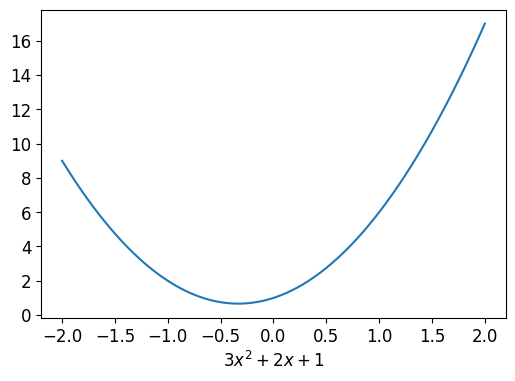

In [15]:
from fastbook import *

# https://forums.fast.ai/t/lesson-6-plot-function-is-not-defined/69667/10

def f(x):
    return 3*x**2 + 2*x + 1

# latex title label with $$
plot_function(f, "$3x^2 + 2x + 1$")